# Exercise 1: Analyzing thresholds

The Receiver Operating Characteristic (ROC) curve is a graphical representation used to evaluate the performance of binary classification models. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

### Step 1: Generating some random data

We simulate the result of the application of an LLM by generating two random vectors, of actual results and expected results (the ground truth). For this simplified example, the corresponding actual vector is always in the same place as the expected vector (it will not be always like this!).

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.metrics import auc


# Generate random dataset (100 vectors, each of 100 dimensions)
np.random.seed(42)  # For reproducibility
expected = np.random.rand(100, 5)  # 100 vectors, each of 100 dimensions


# Perturbation factor
perturbation_factor = 0.4

# Actual vectors
actual = expected + np.random.uniform(-perturbation_factor, perturbation_factor, size=expected.shape)

# Print out the original and modified datasets for comparison
print("Expected (First 2 Vectors):")
print(expected[:2])
print("\nActual (First 2 Vectors):")
print(actual[:2])

# Comparisons can be made as usual through cosine similarity
cos_sim_matrix = cosine_similarity(actual, expected)

print("\nCosine Similarity Matrix:")
print(cos_sim_matrix)

Matplotlib is building the font cache; this may take a moment.


Expected (First 2 Vectors):
[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
 [0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]]

Actual (First 2 Vectors):
[[ 0.53306949  0.9795914   0.57961603  0.8496945   0.30380358]
 [-0.11391193  0.38682536  1.12420594  0.96095494  0.88864818]]
Cosine Similarity Matrix:
[[0.9740174  0.69025215 0.82940883 ... 0.70927124 0.88418735 0.80738231]
 [0.75007353 0.96287563 0.72212803 ... 0.67878737 0.64307642 0.76081671]
 [0.91875492 0.62391039 0.93370096 ... 0.31029501 0.62504575 0.39656296]
 ...
 [0.56483355 0.75560379 0.35199554 ... 0.97594104 0.79354974 0.89656885]
 [0.80461042 0.44187919 0.65048282 ... 0.68477883 0.95322932 0.74493977]
 [0.6329111  0.55587001 0.47325536 ... 0.69645474 0.66916635 0.94531569]]


### Step 2: a function to compute TPR and FPR

True Positive Rate (TPR), also called Sensitivity or Recall, is the proportion of actual positives that are correctly identified by the model. It is given by TPR = TP / (TP + FN), where TP = true positives; FN = False Negatives.

False Positive Rate (FPR) is the proportion of actual negatives that are incorrectly classified as positives. It is given by FPR = FP / (FP + TN), where FP = False Positives, TN = True Negatives.

A classifier typically outputs a probability score for each sample (the likelihood that a sample belongs to the positive class). To classify the sample, you apply a threshold on this score. If the score is above the threshold, the sample is classified as positive (class 1), and if it is below the threshold, it is classified as negative (class 0).


In [ ]:

# Function to compute tpr and fpr given an actual vector, an expected vector, and a threshold

def compute_tpr_fpr(data, data2, threshold=0.9):
    # Compute the cosine similarity between all pairs of vectors
    cos_sim_matrix = cosine_similarity(data, data2)

    # Initialize counters for TP, FP, TN, FN
    tp = 0  # True Positives
    fp = 0  # False Positives
    tn = 0  # True Negatives
    fn = 0  # False Negatives

    # Loop over all the pairs in the matrix
    for i in range(len(data)):
        for j in range(len(data2)):
            # Compute ground truth by checking if the vectors are from the same index in original data
            if i == j:
                # Same vectors should be similar (positive pair)
                ground_truth = 1  # Positive pair (similar)
            else:
                # Different vectors should be dissimilar (negative pair)
                ground_truth = 0  # Negative pair (dissimilar)

            # Apply the threshold to the cosine similarity to obtain the predicted boolean values
            if cos_sim_matrix[i, j] >= threshold:
                predicted = 1  # Predicted as similar
            else:
                predicted = 0  # Predicted as dissimilar

            # Update the counts based on comparison of ground truth and prediction
            if predicted == 1 and ground_truth == 1:
                tp += 1  # True Positive
            elif predicted == 1 and ground_truth == 0:
                fp += 1  # False Positive
            elif predicted == 0 and ground_truth == 0:
                tn += 1  # True Negative
            elif predicted == 0 and ground_truth == 1:
                fn += 1  # False Negative

    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0  # Avoid division by zero
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0  # Avoid division by zero

    return tpr, fpr

# Example of computation for a threshold equal to 0.95
tpr, fpr = compute_tpr_fpr(actual, expected, threshold=0.95)

# Print the result
print(f"True Positive Rate (TPR): {tpr}")
print(f"False Positive Rate (FPR): {fpr}")



True Positive Rate (TPR): 0.44
False Positive Rate (FPR): 0.03888888888888889


### Step 3: Plotting the ROC curve

In the ROC curve:

- The x-axis represents the False Positive Rate (FPR)
- The y-axis represents the True Positive Rate (TPR)

Each point on the ROC curve corresponds to a specific threshold value. By adjusting the threshold, you change the trade-off between TPR and FPR.

### Thresholding

By varying this threshold from 0 to 1, you can calculate different values for TPR and FPR, generating a curve. The threshold determines the sensitivity (TPR) and the specificity (FPR) of the classifier:

- At a high threshold, the model will classify fewer instances as positive, leading to fewer true positives and possibly many false negatives.

- At a low threshold, the model will classify more instances as positive, leading to more true positives but also increasing false positives.

for threshold = 0.0 tpr = 1.0 fpr = 0.9934343434343434
for threshold = 0.010101010101010102 tpr = 1.0 fpr = 0.9926262626262626
for threshold = 0.020202020202020204 tpr = 1.0 fpr = 0.992020202020202
for threshold = 0.030303030303030304 tpr = 1.0 fpr = 0.9913131313131314
for threshold = 0.04040404040404041 tpr = 1.0 fpr = 0.9907070707070708
for threshold = 0.05050505050505051 tpr = 1.0 fpr = 0.9895959595959596
for threshold = 0.06060606060606061 tpr = 1.0 fpr = 0.9888888888888889
for threshold = 0.07070707070707072 tpr = 1.0 fpr = 0.9877777777777778
for threshold = 0.08080808080808081 tpr = 1.0 fpr = 0.9868686868686869
for threshold = 0.09090909090909091 tpr = 1.0 fpr = 0.9856565656565657
for threshold = 0.10101010101010102 tpr = 1.0 fpr = 0.9847474747474747
for threshold = 0.11111111111111112 tpr = 1.0 fpr = 0.9841414141414141
for threshold = 0.12121212121212122 tpr = 1.0 fpr = 0.9834343434343434
for threshold = 0.13131313131313133 tpr = 1.0 fpr = 0.9824242424242424
for threshold = 0.14

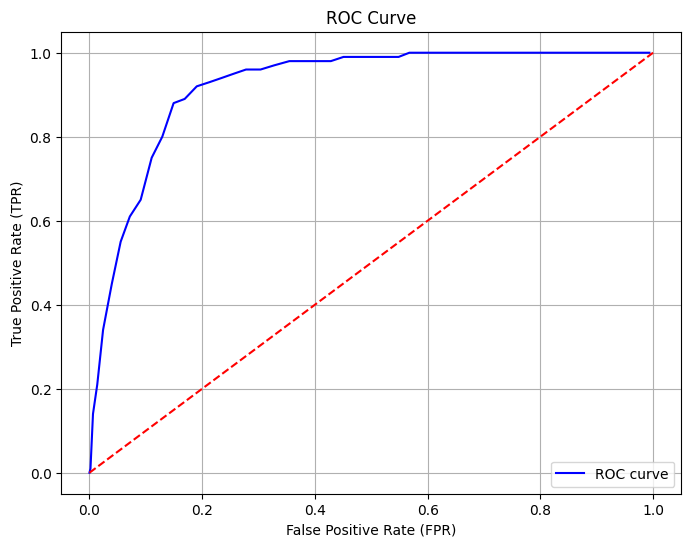

Area Under the ROC Curve (AUC): 0.9143030303030304


In [ ]:
# Compute TPR and FPR at varying thresholds
thresholds = np.linspace(0, 1, 100)  # Create 100 thresholds between 0 and 1
tprs = []
fprs = []

# Loop through all thresholds and calculate TPR and FPR
for threshold in thresholds:
    tpr, fpr = compute_tpr_fpr(actual, expected, threshold)
    tprs.append(tpr)
    fprs.append(fpr)
    print(f"for threshold = {threshold} tpr = {tpr} fpr = {fpr}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fprs, tprs, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guess line (diagonal)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Calculate AUC (Area Under Curve)
roc_auc = auc(fprs, tprs)
print(f'Area Under the ROC Curve (AUC): {roc_auc}')


### Now reason about the following points:

- What happens by varying the size of the vectors?
- What happens by varying the perturbation factor?
- How to cope with cases in which *we don't know* what is the ground truth (i.e., we don't know that the actual result correspond to the one in the same position in the expected results?)

---

# Exercise 2: A simple router architecture

In this architecture, we leverage a Large Language Model (LLM) to dynamically interpret user instructions and route them to the appropriate task-specific prompt. This approach ensures that complex software engineering tasks, such as generating use cases or class diagrams, are efficiently handled based on the user's needs.

The architecture is split into two main stages:

- Router LLM Stage:
  - The LLM analyzes the user's instruction and determines whether the task is related to generating use cases or a class diagram.
  - It outputs a task-specific prompt tailored for the next stage.

- Task Execution LLM Stage:
  - Based on the generated prompt from the router, the LLM executes the required task by producing either:
    - A set of use cases, or
    - A UML class diagram.


In [1]:
# reference code for llama prompting


from transformers import AutoTokenizer, AutoModelForCausalLM
from huggingface_hub import login
import torch
import os

# HF login
# ---------------- LOCAL RUNTIME --------------------------------------------
#hf_token = os.getenv("HUGGING_FACE_HUB_TOKEN")  # The token must have been previously set in the environment variables (the syntax varies depending on your environment)
# ---------------------------------------------------------------------------

# ----------------- Google Colab --------------------------------------------
from google.colab import userdata
hf_token = userdata.get('HF_TOKEN')
#----------------------------------------------------------------------------

login(hf_token)

# Detect the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the tokenizer and model
model_id = "meta-llama/Llama-3.2-3B-Instruct"
model = AutoModelForCausalLM.from_pretrained(model_id, torch_dtype=torch.float16, device_map="auto", token=hf_token)
tokenizer = AutoTokenizer.from_pretrained(model_id, token=hf_token)




# We define a method to ask any prompt to llama
def make_a_query(prompt: str, max_new_tokens:int = 200):
    """
    Send a prompt to the Llama model and get a response.

    Args:
    - prompt (str): The input question or statement to the model.
    - max_new_tokens (int): The maximum length of the response.

    Returns:
    - str: The model's generated response.
    """

    # Both the tokenizer and the model are global variables

    # Set pad_token_id if missing
    if tokenizer.pad_token_id is None:
        tokenizer.pad_token_id = tokenizer.eos_token_id


    # Tokenize the input with padding and truncation
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True).to(device)

    # Compute the lenght of the input prompt to be able to extract the model's response later
    input_ids = inputs["input_ids"]
    prompt_length = input_ids.shape[1]

    # Generate a response
    output = model.generate(
        inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_new_tokens=max_new_tokens,  # Limit the number of new tokens generated (e.g., a single word)
        #temperature=0.3,  # Reduce randomness, use with do_sample = True
        repetition_penalty=2.0,  # Penalize repetition
        no_repeat_ngram_size=3,  # Avoid repeating bigrams
        do_sample= False,  # Set to False to use Greedy or Beam search
        num_beams=3, # Use with do_sample = False
        eos_token_id=tokenizer.eos_token_id,  # End generation at EOS token
        pad_token_id=tokenizer.pad_token_id,  # Avoid padding tokens
        early_stopping=True,
    )

    generated_tokens = output[0, prompt_length:]

    # Decode the response into human-readable text
    response = tokenizer.decode(generated_tokens, skip_special_tokens=True).strip()

    return response



config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

### Step 1: Router LLM - Generate the Next Prompt
The first LLM will analyze the user's instruction and generate one of two possible prompts:

- A prompt for use case generation
- A prompt for class diagram generation

In [10]:
requirements_text = "The proposed platform is designed to enhance the hiking experience for various user groups, including visitors, local guides, platform managers, and hut workers. The platform provides a centralized repository of hiking routes, hut information, and parking facilities. It also enables interactive features such as real-time hike tracking, personalized recommendations, and group hike planning. By combining these capabilities, the platform seeks to foster safe, informed, and collaborative hiking experiences.\
The platform will be deployed as a cloud-based web and mobile application accessible to all stakeholders. The distribution strategy includes an app available on major mobile operating systems, such as iOS and Android, alongside a responsive web interface. It will require an internet connection for features like real-time tracking, notifications, and user authentication, though some offline capabilities, such as pre-downloaded hike information, will also be available.\
User authentication will be role-based, ensuring that only authorized users, such as verified hut workers and platform managers, can access sensitive or administrative features.\
Visitors are the primary users of the platform. They can browse a comprehensive list of hiking trails, filter them based on specific criteria such as difficulty, length, or starting point, and view detailed descriptions. To access advanced features like personalized recommendations, visitors can create user accounts by registering on the platform. Registered users can record their fitness parameters, enabling the system to suggest trails tailored to their capabilities.\
During a hike, visitors can record their progress by marking reference points and sharing their live location through a broadcasting URL. They can also initiate group activities by planning hikes, adding group members, and confirming group participation. The platform allows visitors to start, terminate, and track their hikes, with notifications for unfinished hikes or late group members to ensure safety and accountability.\
Local guides enrich the platform by contributing essential information. They can add detailed descriptions of hikes, parking facilities, and huts, ensuring hikers have accurate and comprehensive data. Local guides also link parking lots and huts to specific trails as starting or arrival points, enhancing the planning process.\
To aid in the visual representation and accessibility of information, local guides can upload pictures of huts and connect these locations directly to hikes. This integration simplifies route planning and helps visitors visualize their journey.\
Platform managers oversee the operational integrity and safety of the platform. They verify new hut worker registrations, ensuring that only authorized personnel can update hut-related data. Managers can also broadcast weather alerts for specific areas, notifying all hikers in those regions through push notifications. This ensures that users stay informed about potentially hazardous conditions.\
The platform manager's role includes maintaining an organized and secure user system while facilitating collaboration between local guides, hut workers, and visitors.\
Hut workers are critical to the maintenance of up-to-date trail and accommodation information. After registering and being verified, hut workers can log into the platform to add or update information about their assigned huts, including uploading pictures and describing the facilities available. They can also monitor and report on the condition of nearby trails, ensuring hikers receive current information.\
Hut workers play a vital role in providing situational updates for hikers. For instance, if a nearby trail is impacted by severe weather or physical obstructions, they can communicate these conditions through the platform. This enhances the safety and preparedness of all hikers relying on the platform."


user_instruction = f"""I want the use cases for: [system description] = {requirements_text}""" # Try to change this


sys_prompt = f"""
You are a system that routes software engineering tasks. Analyze the user's instruction and generate one of the following:

1. If the instruction is about generating use cases, output:
"Use Cases"

2. If the instruction is about generating a class diagram, output:
"Class Diagram"
"""

messages = [
    {
        'role': 'system',
        'content': sys_prompt
    },
    {
        'role': 'user',
        'content': user_instruction
    }
]

prompt_router = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)


# The response here will be only used for guiding the generation of the next prompt.
# It must be one of two alternatives: "Use Cases" or "Class Diagram"
response = make_a_query(prompt_router, max_new_tokens = 2000)

print("RESPONSE: ", response)

RESPONSE:  Use Cases


### Step 2: Task-Specific LLM - Generate Output
The second LLM will use the selected prompt to either:

- Generate use cases, or
- Generate a class diagram

In use case diagram design, the primary components typically include actors, which are entities interacting with the system, and use cases, which represent the goals or tasks the actors want to achieve. The diagram focuses on the interactions between these actors and the system, illustrating the functional requirements of the system from a user perspective. For this simplified example, we are focusing only on user-goal use cases (i.e., main functions of the system).

In class diagram design, typically, the primary elements extracted are classes, their attributes, methods, and the relationships between them. Classes represent entities within the system, and attributes define their properties or characteristics. Methods outline the actions or operations that can be performed on or by a class. Additionally, relationships like associations, inheritance, and dependencies are represented to show how different classes interact with one another. For this simplified example, we are focusing only on the classes, leaving the recognition of individual attributes to other prompts.

In [11]:

#TODO: THE PROMPTS BELOW ARE JUST SAMPLES. REFINE THEM BY CONSTRAINING THE SIZE OF THE OUTPUT OR POST-PROCESSING THE RESPONSE

import re
import string

#remove all non textual characters from the response
fixed_response = re.sub(r'[{}]'.format(re.escape(string.punctuation)), '', response).strip()



print("Router selection: ", fixed_response)


if fixed_response == "Use Cases" :

    sys_prompt = """
    You are a system analyst tasked with identifying the use cases for a hiking platform system based on the following requirements. Your task is to analyze the system description and generate a list of user-goal use cases that represent how different types of users interact with the system. """

    shot_example = [
        {
          'role': 'user',
          'content': """**Requirements text**
                        The Library Management System is designed to facilitate the management of books and users in a library environment. Users can browse the library's catalog, search for books by title or author, borrow available books, and return them once finished. The system tracks each user's borrowed books and ensures that no book is borrowed by multiple users at the same time. Librarians are responsible for managing the books in the library, including adding new books, deleting outdated ones, and maintaining an updated catalog. They also have the ability to view and manage users' borrowing history, ensuring books are returned on time and handling overdue items. Admins oversee the system's operations, including managing user roles by adding or removing librarians and viewing system logs to track all activities. The system also includes a Transaction class to track borrow and return dates for each book, associating transactions with specific users and books. This structure ensures smooth operations, accountability, and efficient management of library resources."""
      },
        {
          'role': 'assistant',
          'content': """**Output**
                        Use cases: Browse catalog of books, search for books, borrow books, return books, Add books, delete books, manage users' borrowing history, Add/remove librarian, view system logs"""
        }
    ]

    query = f"""Now, please review the full system requirements text below.

    {requirements_text}

    Identify and list the use cases for the hiking platform system."""

    messages = [
        {
            'role': 'system',
            'content': sys_prompt
        },
        *shot_example,
        {
            'role': 'user',
            'content': query
        }
    ]

    prompt_use_cases = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

    response_uc = make_a_query(prompt_use_cases, max_new_tokens = 2000)

    print(response_uc)

    #print(prompt_use_cases)


elif fixed_response == "Class Diagram" :

  sys_prompt = """
  You are a system analyst tasked with identifying the classes to implement a hiking platform system based on the following requirements. Your task is to analyze the system description and generate a list of classes. """

  shot_example = [
      {
          'role': 'user',
          'content': """
    **Requirements text**
    The Library Management System is designed to facilitate the management of books and users in a library environment. Users can browse the library's catalog, search for books by title or author, borrow available books, and return them once finished. The system tracks each user's borrowed books and ensures that no book is borrowed by multiple users at the same time. Librarians are responsible for managing the books in the library, including adding new books, deleting outdated ones, and maintaining an updated catalog. They also have the ability to view and manage users' borrowing history, ensuring books are returned on time and handling overdue items. Admins oversee the system's operations, including managing user roles by adding or removing librarians and viewing system logs to track all activities. The system also includes a Transaction class to track borrow and return dates for each book, associating transactions with specific users and books. This structure ensures smooth operations, accountability, and efficient management of library resources."""
      },
      {
          'role': 'assistant',
          'content': """User, Librarian, Admin, Book, Transaction"""
      }
  ]

  query = f"""Now, please review the full system requirements text below.

  {requirements_text}

  Extract the classes based on the requirements."""

  messages = [
      {
          'role': 'system',
          'content': sys_prompt
      },
      *shot_example,
      {
          'role': 'user',
          'content': query
      }
  ]

  prompt_class_diagram = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

  response_cd = make_a_query(prompt_class_diagram, max_new_tokens = 2000)

  print(response_cd)


else :

    print("Unrecognized command from the user")


Router selection:  Use Cases
Based on the provided system requirements, I have identified the following use cases:

**User-Goal Use Cases**

1. **Browse Hiking Trails**: As a visitor, I want to view a comprehensive listing of hiking trials, so that I can plan my trip.
2. **Search for Hiking Trials**: As Visitor, I wish to search for hiking trails by specific criteria (e.g., difficulty level, distance, starting point), so I can find trails that suit my needs.
3. **Create User Account**: As Visiter, I would like to register on the platfrom to access personalized recommendations and other advanced features.
4. **Record Fitness Parameters**: As Registered User, I'd like to input my fitness levels, so the system can suggest trails suitable for my abilities.
5. **Start/Join a Hike**: As registered user, I can initiate a hike and invite others to join, so we can explore together.
6. **Track Hike Progress**: As Hiker, I should be able to mark reference points during my hike and share my live l

### Step 3: Reasoning

Now reason about the following steps:
- How can I evaluate the results?
- How can I extend the prompts to provide other aspects of class and uml diagrams?
- Try to execute the prompts with the ChatGPT engine. What are your results?